In [16]:
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom as npzoom


In [12]:
cv2.imread('cell.tif',cv2.IMREAD_UNCHANGED).shape

(1004, 1004)

In [32]:
import torch
import numpy as np
from skimage import filters
from skimage.util import random_noise, img_as_ubyte, img_as_float
from scipy.ndimage.interpolation import zoom as npzoom
from skimage.transform import rescale
import cv2
import matplotlib.pyplot as plt

'''
 The additive-Gaussian model also outperformed the model trained with manually acquired training pairs (real world) across all metrics. 
 We further compared additive Gaussian with ‘additive Gaussian (roughly 80×)’, where we used approximately 80× more training data, which did not substantially increase the peak-signal-to-noise ratio (PSNR) or structural similarity (SSIM) measurements, but did further increase the resolution as measured by Fourier ring correlation (FRC) analysis.
'''

LR_path = 'img/LR_example.tif'
HR_path = 'img/HR_example.tif'

def addnoise_localvar(x, scale=4, upsample=False):
    xn = np.array(x)
    xorig_max = xn.max()
    xn = xn.astype(np.float32)
    xn /= float(np.iinfo(np.uint16).max)
    lvar = filters.gaussian(xn, sigma=5) + 1e-10
    xn = random_noise(xn, mode='localvar', local_vars=lvar*0.5)
    new_max = xn.max()
    x = xn
    if new_max > 0:
        xn /= new_max
    xn *= xorig_max
    x_down = npzoom(xn, 1/scale, order=1)    # 双线性插值算法（当参数order=1时）scale: / 4
    #x_up = npzoom(x_down, scale, order=1)
    xn = random_noise(x_down, mode='localvar', local_vars=lvar*0.5)
    return x_down

plt.rcParams["figure.figsize"] = (16,16)

img_LR = cv2.imread(LR_path,cv2.IMREAD_UNCHANGED)
img_oriHR = cv2.imread(HR_path,cv2.IMREAD_UNCHANGED)
img_HR = addnoise_localvar(img_oriHR)

plt.subplot(1,3,1)
plt.imshow(img_oriHR,vmin=0,vmax=65535,cmap="gray")

plt.subplot(1,3,2)
plt.imshow(img_HR,vmin=0,vmax=65535,cmap="gray")

plt.subplot(1,3,3)
plt.imshow(img_LR,vmin=0,vmax=img_LR.max(),cmap="gray")
    

ValueError: operands could not be broadcast together with shapes (251,251) (1004,1004) 

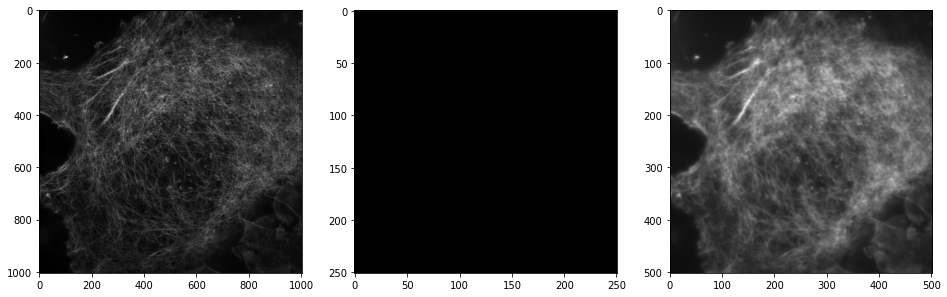

In [15]:
# if __name__ == '__main__':
# import os
# os.chdir(os.getcwd())

plt.rcParams["figure.figsize"] = (16,16)

img_LR = cv2.imread(LR_path,cv2.IMREAD_UNCHANGED)
img_oriHR = cv2.imread(HR_path,cv2.IMREAD_UNCHANGED)
img_HR = addnoise_localvar(img_oriHR)

plt.subplot(1,3,1)
plt.imshow(img_oriHR,vmin=0,vmax=65535,cmap="gray")

plt.subplot(1,3,2)
plt.imshow(img_HR,vmin=0,vmax=65535,cmap="gray")

plt.subplot(1,3,3)
plt.imshow(img_LR,vmin=0,vmax=img_LR.max(),cmap="gray")

In [5]:
import numpy as np
a = [[1,2,3],[4,5,6],[7,8,9]]
a = np.array(a)
np.mean(a)

5.0